In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlb
import matplotlib.pyplot as plt
import os

# to display images

from matplotlib.image import imread

import IPython
from IPython.display import display
from IPython.display import Image

from scipy.ndimage import gaussian_filter
from PIL import Image as Image_PIL
import PIL

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image

# setting
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns=200
pd.options.display.max_rows=200

2022-10-07 08:04:47.243194: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-07 08:04:47.376097: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-07 08:04:47.387153: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-07 08:04:47.387167: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
os.getcwd()

'/home/houssein/Documents/openclassrooms/p8/deployez_un_modele_dans_le_cloud'

In [3]:
os.listdir()

['venv',
 '.idea',
 '.ipynb_checkpoints',
 'p8_pretreatment_reduction.ipynb',
 'data',
 'p8_pretreatment_reduction_1.ipynb',
 'hello_word.py',
 'text.txt']

In [4]:
os.listdir('data/')

['fruits-360-original-size', 'fruits-360']

In [5]:
os.listdir('data/fruits-360/')

['papers', 'LICENSE', 'readme.md', 'test-multiple_fruits', 'Test', 'Training']

In [6]:
os.listdir('data/fruits-360/Test/')

['Cucumber Ripe 2',
 'Hazelnut',
 'Tomato 3',
 'Mango',
 'Passion Fruit',
 'Mulberry',
 'Grape Blue',
 'Kiwi',
 'Walnut',
 'Pear Williams',
 'Mango Red',
 'Carambula',
 'Avocado',
 'Quince',
 'Apple Red 1',
 'Blueberry',
 'Apple Crimson Snow',
 'Apricot',
 'Tomato 4',
 'Pepper Red',
 'Apple Red Yellow 1',
 'Onion White',
 'Cherry Wax Black',
 'Tomato 1',
 'Maracuja',
 'Grape White 3',
 'Kumquats',
 'Tomato 2',
 'Rambutan',
 'Grape Pink',
 'Cherry 1',
 'Cherry 2',
 'Pear',
 'Physalis',
 'Mangostan',
 'Nut Pecan',
 'Tomato Maroon',
 'Fig',
 'Peach Flat',
 'Limes',
 'Apple Red Yellow 2',
 'Pear Forelle',
 'Tomato not Ripened',
 'Tamarillo',
 'Cucumber Ripe',
 'Granadilla',
 'Corn',
 'Mandarine',
 'Kohlrabi',
 'Apple Golden 2',
 'Cherry Wax Yellow',
 'Cantaloupe 2',
 'Apple Red 3',
 'Raspberry',
 'Plum 3',
 'Plum',
 'Pepper Green',
 'Banana',
 'Onion Red',
 'Apple Golden 3',
 'Potato Red Washed',
 'Tomato Cherry Red',
 'Physalis with Husk',
 'Cocos',
 'Banana Red',
 'Grapefruit Pink',
 'Ca

In [7]:
len(os.listdir('data/fruits-360/Test'))

131

In [8]:
categories = os.listdir('data/fruits-360/Test')
for i in range(len(categories)):
    categories[i] = categories[i].lower()
    cat = categories[i].split()
    categories[i] = '_'.join(c for c in cat)
    # print(categories[i])
d = {'categories': categories}
df = pd.DataFrame(data=d)
df = df.sort_values('categories')
df.reset_index().drop(columns='index')

,categories
0,apple_braeburn
1,apple_crimson_snow
2,apple_golden_1
3,apple_golden_2
4,apple_golden_3
5,apple_granny_smith
6,apple_pink_lady
7,apple_red_1
8,apple_red_2
9,apple_red_3


In [9]:
categories = os.listdir('data/fruits-360/Test')
for category in categories:
    category = category.lower()
    cat = category.split()
    category = '_'.join(c for c in cat)
    print(category)
d = {'categories': categories}
df = pd.DataFrame(data=d)
df

cucumber_ripe_2
hazelnut
tomato_3
mango
passion_fruit
mulberry
grape_blue
kiwi
walnut
pear_williams
mango_red
carambula
avocado
quince
apple_red_1
blueberry
apple_crimson_snow
apricot
tomato_4
pepper_red
apple_red_yellow_1
onion_white
cherry_wax_black
tomato_1
maracuja
grape_white_3
kumquats
tomato_2
rambutan
grape_pink
cherry_1
cherry_2
pear
physalis
mangostan
nut_pecan
tomato_maroon
fig
peach_flat
limes
apple_red_yellow_2
pear_forelle
tomato_not_ripened
tamarillo
cucumber_ripe
granadilla
corn
mandarine
kohlrabi
apple_golden_2
cherry_wax_yellow
cantaloupe_2
apple_red_3
raspberry
plum_3
plum
pepper_green
banana
onion_red
apple_golden_3
potato_red_washed
tomato_cherry_red
physalis_with_husk
cocos
banana_red
grapefruit_pink
cactus_fruit
avocado_ripe
pepino
pomelo_sweetie
banana_lady_finger
nut_forest
strawberry_wedge
pear_2
clementine
cantaloupe_1
tangelo
grape_white
cherry_wax_red
apple_braeburn
pomegranate
chestnut
onion_red_peeled
salak
pear_kaiser
beetroot
cherry_rainier
apple_pink_l

,categories
0,Cucumber Ripe 2
1,Hazelnut
2,Tomato 3
3,Mango
4,Passion Fruit
5,Mulberry
6,Grape Blue
7,Kiwi
8,Walnut
9,Pear Williams


In [10]:
len(os.listdir('data/fruits-360/Training/'))

131

In [11]:
len(os.listdir('data/fruits-360/Test/Potato White/'))

150

In [12]:
for roots,dirs,files in os.walk('data/fruits-360'):
    print(roots,len(dirs),len(files))

data/fruits-360 4 2
data/fruits-360/papers 0 1
data/fruits-360/test-multiple_fruits 0 103
data/fruits-360/Test 131 0
data/fruits-360/Test/Cucumber Ripe 2 0 156
data/fruits-360/Test/Hazelnut 0 157
data/fruits-360/Test/Tomato 3 0 246
data/fruits-360/Test/Mango 0 166
data/fruits-360/Test/Passion Fruit 0 166
data/fruits-360/Test/Mulberry 0 164
data/fruits-360/Test/Grape Blue 0 328
data/fruits-360/Test/Kiwi 0 156
data/fruits-360/Test/Walnut 0 249
data/fruits-360/Test/Pear Williams 0 166
data/fruits-360/Test/Mango Red 0 142
data/fruits-360/Test/Carambula 0 166
data/fruits-360/Test/Avocado 0 143
data/fruits-360/Test/Quince 0 166
data/fruits-360/Test/Apple Red 1 0 164
data/fruits-360/Test/Blueberry 0 154
data/fruits-360/Test/Apple Crimson Snow 0 148
data/fruits-360/Test/Apricot 0 164
data/fruits-360/Test/Tomato 4 0 160
data/fruits-360/Test/Pepper Red 0 222
data/fruits-360/Test/Apple Red Yellow 1 0 164
data/fruits-360/Test/Onion White 0 146
data/fruits-360/Test/Cherry Wax Black 0 164
data/fruit

In [13]:
data = pd.DataFrame()
for roots,dirs,files in os.walk('data/fruits-360/Test/'):
    #print(roots, roots[21:],files)
    data_1 = pd.DataFrame({'path':roots, 'category':roots[21:], 'image':files})
    data = data.append(data_1, ignore_index=True)
data

,path,category,image
0,data/fruits-360/Test/Cucumber Ripe 2,Cucumber Ripe 2,196_100.jpg
1,data/fruits-360/Test/Cucumber Ripe 2,Cucumber Ripe 2,218_100.jpg
2,data/fruits-360/Test/Cucumber Ripe 2,Cucumber Ripe 2,198_100.jpg
3,data/fruits-360/Test/Cucumber Ripe 2,Cucumber Ripe 2,169_100.jpg
4,data/fruits-360/Test/Cucumber Ripe 2,Cucumber Ripe 2,r_164_100.jpg
...,...,...,...
22683,data/fruits-360/Test/Kaki,Kaki,8_100.jpg
22684,data/fruits-360/Test/Kaki,Kaki,r_159_100.jpg
22685,data/fruits-360/Test/Kaki,Kaki,285_100.jpg
22686,data/fruits-360/Test/Kaki,Kaki,r_153_100.jpg


In [14]:
data

,path,category,image
0,data/fruits-360/Test/Cucumber Ripe 2,Cucumber Ripe 2,196_100.jpg
1,data/fruits-360/Test/Cucumber Ripe 2,Cucumber Ripe 2,218_100.jpg
2,data/fruits-360/Test/Cucumber Ripe 2,Cucumber Ripe 2,198_100.jpg
3,data/fruits-360/Test/Cucumber Ripe 2,Cucumber Ripe 2,169_100.jpg
4,data/fruits-360/Test/Cucumber Ripe 2,Cucumber Ripe 2,r_164_100.jpg
...,...,...,...
22683,data/fruits-360/Test/Kaki,Kaki,8_100.jpg
22684,data/fruits-360/Test/Kaki,Kaki,r_159_100.jpg
22685,data/fruits-360/Test/Kaki,Kaki,285_100.jpg
22686,data/fruits-360/Test/Kaki,Kaki,r_153_100.jpg


In [15]:
np.array(data['path'][0]+'/'+data['image'][0])

array('data/fruits-360/Test/Cucumber Ripe 2/196_100.jpg', dtype='<U48')

## read images with matplotlib methodes

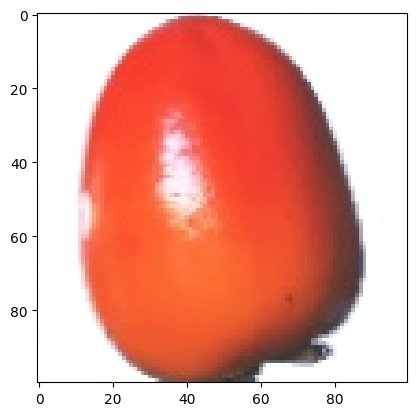

In [16]:
filename = data['path'][22687]+'/'+data['image'][22687]
image = imread(filename) # matplotlib method to read images
plt.imshow(image)

In [17]:
image.shape

(100, 100, 3)

In [18]:
image[50,49]

array([253,  93,  59], dtype=uint8)

## read images with tensorflow methodes

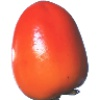

In [19]:
load_img(filename)

In [20]:
img_to_array(load_img(filename))

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

## read images with PIL methodes

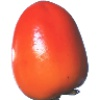

In [21]:
Image_PIL.open(filename)


In [22]:
img = Image_PIL.open(filename)

In [23]:
len(img.getdata())

10000

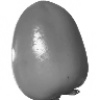

In [24]:
img = img.convert('L')

img

## spark code for reading jpg files, extract features & excute a pca

In [25]:
from pyspark import SparkContext
from pyspark.sql import SparkSession, Row
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StandardScaler
import pyspark.sql.functions as f
import pyspark.sql.types
import pandas as pd
from pyspark.sql import Row

from pyspark import SparkConf
conf = SparkConf()
# This should've disabled auto-broadcast
conf.set("spark.sql.autoBroadcastJoinThreshold", -1)


spark = SparkSession.builder.getOrCreate()
sc = SparkContext.getOrCreate(conf=conf)
from pyspark.ml.feature import VectorAssembler

from pyspark.ml.image import ImageSchema
#from keras.applications import inception_v3, xception, ResNet50
#from sparkdl import DeepImageFeaturizer

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/10/07 08:04:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [26]:
columns = ["path","category","filename"]
df = spark.createDataFrame(data=data, schema = columns)
df.show()

+--------------------+---------------+-------------+
|                path|       category|     filename|
+--------------------+---------------+-------------+
|data/fruits-360/T...|Cucumber Ripe 2|  196_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|  218_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|  198_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|  169_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|r_164_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|r_186_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|  128_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|  204_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|r_157_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|  125_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|  188_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|  207_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2| r_21_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|  121_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|  234_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|  205_10

In [27]:
print((df.count(), len(df.columns)))

(22688, 3)


In [28]:
df.select("path").show(1, truncate=False)

+------------------------------------+
|path                                |
+------------------------------------+
|data/fruits-360/Test/Cucumber Ripe 2|
+------------------------------------+
only showing top 1 row



In [29]:
# Select distinct rows
distinctDF = df.select("path").distinct()
distinctDF.show(truncate=False)
print(distinctDF.count())
distinctDF.collect()[0][0]


+---------------------------------------+
|path                                   |
+---------------------------------------+
|data/fruits-360/Test/Mulberry          |
|data/fruits-360/Test/Mango             |
|data/fruits-360/Test/Passion Fruit     |
|data/fruits-360/Test/Cucumber Ripe 2   |
|data/fruits-360/Test/Hazelnut          |
|data/fruits-360/Test/Tomato 3          |
|data/fruits-360/Test/Kiwi              |
|data/fruits-360/Test/Pear Williams     |
|data/fruits-360/Test/Grape Blue        |
|data/fruits-360/Test/Mango Red         |
|data/fruits-360/Test/Walnut            |
|data/fruits-360/Test/Tomato 1          |
|data/fruits-360/Test/Apple Red 1       |
|data/fruits-360/Test/Blueberry         |
|data/fruits-360/Test/Onion White       |
|data/fruits-360/Test/Apple Red Yellow 1|
|data/fruits-360/Test/Quince            |
|data/fruits-360/Test/Apricot           |
|data/fruits-360/Test/Pepper Red        |
|data/fruits-360/Test/Tomato 4          |
+---------------------------------

'data/fruits-360/Test/Mulberry'

In [30]:
distinctDF.show(1, truncate=False)

+-----------------------------+
|path                         |
+-----------------------------+
|data/fruits-360/Test/Mulberry|
+-----------------------------+
only showing top 1 row



In [31]:
for row in distinctDF:
    print(row)

Column<'path'>


In [32]:
# Import necessary libraries
from pyspark.sql.types import *
 
# Create an empty RDD
emp_RDD = spark._sc.emptyRDD()
 
# # Create empty schema
# cols = StructType([])

#Create Schema
from pyspark.sql.types import StructType,StructField, StringType

cols = StructType([
  StructField('image', StructType([
      StructField('origin', StringType(), True),
      StructField('height', IntegerType(), True),
      StructField('width', IntegerType(), True),
      StructField('nChannels', IntegerType(), True),
      StructField('mode', IntegerType(), True),
      StructField('data', BinaryType(), True)
  ]))]) 


# Create an empty RDD with empty schema
df_photos = spark.createDataFrame(data = emp_RDD, schema = cols)
  

for i in range(distinctDF.count()):
   df_photo = spark.read.format("image").load(distinctDF.collect()[i][0])
   df_photos = df_photos.union(df_photo)


df_photos.select("image.origin", 'image.nChannels', "image.width", "image.height","image.mode", 
   "image.data").show()

+--------------------+---------+-----+------+----+--------------------+
|              origin|nChannels|width|height|mode|                data|
+--------------------+---------+-----+------+----+--------------------+
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF F

In [33]:
df_photos.count()

22688

In [34]:
df_photos.select("image.origin").show(1, truncate=False)

+----------------------------------------------------------------------------------------------------------------------------+
|origin                                                                                                                      |
+----------------------------------------------------------------------------------------------------------------------------+
|file:///home/houssein/Documents/openclassrooms/p8/deployez_un_modele_dans_le_cloud/data/fruits-360/Test/Mulberry/191_100.jpg|
+----------------------------------------------------------------------------------------------------------------------------+
only showing top 1 row



In [35]:
df_photos_preprocess = df_photos.select("image.origin", 'image.nChannels', "image.width", "image.height","image.mode", 
   "image.data")
df_photos_preprocess.show()

+--------------------+---------+-----+------+----+--------------------+
|              origin|nChannels|width|height|mode|                data|
+--------------------+---------+-----+------+----+--------------------+
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF F

In [36]:
import pyspark.sql.functions as F
from pyspark.ml.image import ImageSchema
from pyspark.ml.linalg import DenseVector, VectorUDT, Vectors
from pyspark.sql.functions import udf

# ImageSchema.imageFields

# img2vec = F.udf(lambda x: DenseVector(ImageSchema.toNDArray(x).flatten()), VectorUDT())

# Les données images sont converties au format vecteur dense
ud_f = udf(lambda x: Vectors.dense(x), VectorUDT())
df_photos_preprocess = df_photos_preprocess.withColumn('vecs', ud_f('data'))

# df_photos_preproccess = df_photos_preproccess.withColumn('vecs', img2vec("data"))
df_photos_preprocess.show(10)
df_photos_preprocess.printSchema()

22/10/07 08:05:15 WARN DAGScheduler: Broadcasting large task binary with size 1044.0 KiB


+--------------------+---------+-----+------+----+--------------------+--------------------+
|              origin|nChannels|width|height|mode|                data|                vecs|
+--------------------+---------+-----+------+----+--------------------+--------------------+
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...

In [37]:
df_photos_preprocess.select('vecs').show(1, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [38]:
#df_photos_preprocess.select('vecs').collect()

In [39]:
scaler = StandardScaler(inputCol='vecs', outputCol='scaled_vecs', withStd=True, withMean=True)

# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(df_photos_preprocess)
df_photos_preprocess = scalerModel.transform(df_photos_preprocess)
df_photos_preprocess.show()

22/10/07 08:05:20 WARN DAGScheduler: Broadcasting large task binary with size 1042.2 KiB


22/10/07 08:05:22 ERROR Executor: Exception in task 31.0 in stage 298.0 (TID 2326)
java.io.FileNotFoundException: 
File file:/home/houssein/Documents/openclassrooms/p8/deployez_un_modele_dans_le_cloud/data/fruits-360/Test/Passion%20Fruit/r_325_100.jpg does not exist

It is possible the underlying files have been updated. You can explicitly invalidate
the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by
recreating the Dataset/DataFrame involved.
       
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:648)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:212)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:270)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:116)
	at scala.collection.Iterator$$anon

22/10/07 08:05:22 WARN TaskSetManager: Lost task 32.0 in stage 298.0 (TID 2327) (hou executor driver): TaskKilled (Stage cancelled)
22/10/07 08:05:22 WARN TaskSetManager: Lost task 27.0 in stage 298.0 (TID 2322) (hou executor driver): TaskKilled (Stage cancelled)
22/10/07 08:05:22 WARN TaskSetManager: Lost task 20.0 in stage 298.0 (TID 2315) (hou executor driver): TaskKilled (Stage cancelled)
22/10/07 08:05:22 WARN TaskSetManager: Lost task 16.0 in stage 298.0 (TID 2311) (hou executor driver): TaskKilled (Stage cancelled)
22/10/07 08:05:22 WARN TaskSetManager: Lost task 24.0 in stage 298.0 (TID 2319) (hou executor driver): TaskKilled (Stage cancelled)
22/10/07 08:05:22 WARN TaskSetManager: Lost task 17.0 in stage 298.0 (TID 2312) (hou executor driver): TaskKilled (Stage cancelled)
22/10/07 08:05:22 WARN TaskSetManager: Lost task 18.0 in stage 298.0 (TID 2313) (hou executor driver): TaskKilled (Stage cancelled)
22/10/07 08:05:22 WARN TaskSetManager: Lost task 25.0 in stage 298.0 (TID 23

Py4JJavaError: An error occurred while calling o767.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 31 in stage 298.0 failed 1 times, most recent failure: Lost task 31.0 in stage 298.0 (TID 2326) (hou executor driver): java.io.FileNotFoundException: 
File file:/home/houssein/Documents/openclassrooms/p8/deployez_un_modele_dans_le_cloud/data/fruits-360/Test/Passion%20Fruit/r_325_100.jpg does not exist

It is possible the underlying files have been updated. You can explicitly invalidate
the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by
recreating the Dataset/DataFrame involved.
       
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:648)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:212)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:270)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:116)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.ContextAwareIterator.hasNext(ContextAwareIterator.scala:39)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1211)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1217)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:307)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.writeIteratorToStream(PythonUDFRunner.scala:53)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:438)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2066)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:272)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2672)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2607)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2607)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2860)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2791)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: java.io.FileNotFoundException: 
File file:/home/houssein/Documents/openclassrooms/p8/deployez_un_modele_dans_le_cloud/data/fruits-360/Test/Passion%20Fruit/r_325_100.jpg does not exist

It is possible the underlying files have been updated. You can explicitly invalidate
the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by
recreating the Dataset/DataFrame involved.
       
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:648)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:212)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:270)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:116)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.ContextAwareIterator.hasNext(ContextAwareIterator.scala:39)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1211)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1217)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:307)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.writeIteratorToStream(PythonUDFRunner.scala:53)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:438)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2066)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:272)
